**Implement normal distribution in python and visualize it for Mean =100, standard _deviation =4, dataset size=100000**

## Normal Distribution

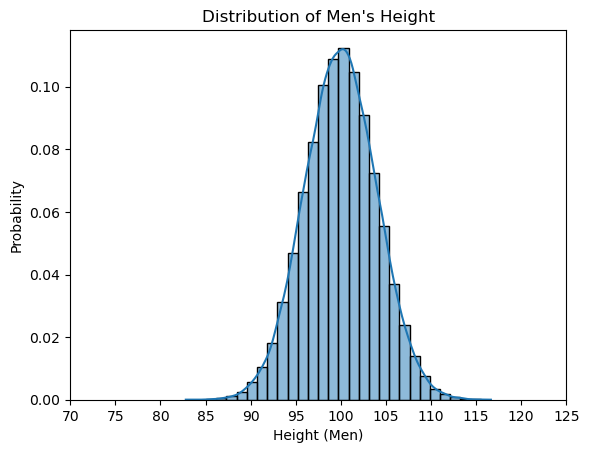

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

mean, standardDeeviation = 100, 4
data = np.random.normal(mean, standardDeeviation, 100000)

sns.histplot(data, bins=30, kde=True, stat='probability')
plt.xlabel('Height (Men)')
plt.ylabel('Probability')
plt.title("Distribution of Men's Height")
plt.xticks(range(70,130,5))
plt.show()

## Standard Normal Distribution

Percentage of data within one standard deviation: 68.3
Percentage of data within two standard deviation: 95.49
Percentage of data within three standard deviation: 99.74


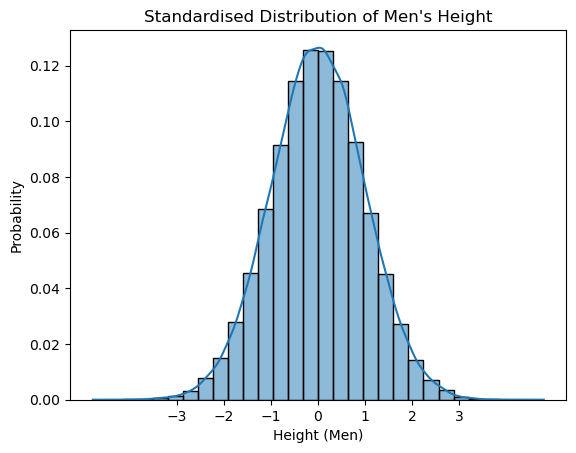

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Generating normally distributed data for Height of Men
mean, standardDeviation = 100, 4
data = np.random.normal(mean, standardDeviation, 100000)

# Finding the z-score for every value in the data
# z-score calculates how many deviation away perticuler value is from it's mean
data = (data - mean)/standardDeviation

#Proving the empirical rule
one_sd = len(data[(data>-1) & (data<1)])/len(data)*100
two_sd = len(data[(data>-2) & (data<2)])/len(data)*100
three_sd = len(data[(data>-3) & (data<3)])/len(data)*100

print('Percentage of data within one standard deviation:', round(one_sd,2))
print('Percentage of data within two standard deviation:', round(two_sd,2))
print('Percentage of data within three standard deviation:', round(three_sd,2))

#Plotting the z-scores
sns.histplot(data, bins=30, kde=True, stat='probability')
plt.xlabel('Height (Men)')
plt.ylabel('Probability')
plt.xticks(range(-3,4,1))
plt.title("Standardised Distribution of Men's Height")
plt.show()

**What % of men are shorter than 95 cm?**

In [31]:
from scipy.stats import norm
mean = 100
standardDeviation = 4

# finding z-score for 183
z = (95-mean)/standardDeviation

# find the probability (area under the curse until 183 cm)
p = norm.cdf(z)

print("Percentage of men shorter than 95 cm: ", round(p*100,2))

# In summary, this code calculates the percentage of men who are shorter than 183 cm based on 
# a normal distribution with a specified mean and standard deviation, using z-scores and the cumulative distribution function.

Percentage of men shorter than 95 cm:  10.56


**What is the probability of a man’s height being more than 95 cm?**

In [34]:
from scipy.stats import norm
mean = 100
standardDeviation = 4

# finding the z-score for 177
z = (95-mean)/standardDeviation

# finding probability of by ( 1 - probability of z-score of 177)
p = 1 - norm.cdf(z)

print("Percentage of men taller than 95: ", round(p*100, 2))

Percentage of men taller than 95:  89.44


**What is the height of a man who is taller than 80% of all the men?**

In [11]:
# we have norm.cdf(z) = 0.8
# we need to find the value for this z-score which depends on this probability

mean = 100
standardDeviation = 4

# finding the z-score for 0.8 probability
z = norm.ppf(0.8)
# finding the actual value using the z-score formula
x = (z*standardDeviation) + mean

print("Height of man who is taller than 80% of man or\n",
      "Height of man for which 80% of men are shorter is: ", round(x, 2))

Height of man who is taller than 80% of man or
 Height of man for which 80% of men are shorter is:  103.37


## Tests for Normality

**QQ Plot: A Q-Q plot (Quantile-Quantile Plot) compares the quantiles/z-scores of the data against the quantiles of a theoretical normal distribution. A function in python’s statsmodels library called qqplot can be used to create the plot**

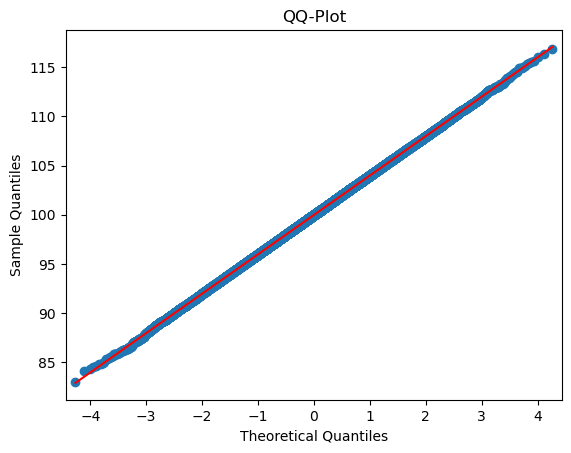

In [14]:
#QQPlot

import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

#Generating normally distributed data for height of men
mu, sigma = 100, 4
data = np.random.normal(mu, sigma, 100000)

#QQPlot
fig = sm.qqplot(data, line='s')
plt.title('QQ-Plot')
plt.show()

**Shapiro-Wilk Test and Kolmogrov-Smirnoff test (KSTest)**

In [25]:
import numpy as np
from scipy.stats import norm
from scipy.stats import shapiro, kstest

#Generating normally distributed data for height of men
mu, sigma = 100, 4
data = np.random.normal(mu, sigma, 100000)

# H0: Data is Gaussian
# Ha: Data is not Gaussian

# Shapiro Test for Normality
test_stat, p_value = shapiro(data)

print('Result of Shapiro Test:')
if p_value < 0.05:
  print('Reject H0')
  print('Data is not Gaussian')
else:
  print('Fail to reject H0')
  print('Data is Gaussian')

# Kolmogrov-Smirnoff Test for Normality
test_stat, p_value = kstest(data, norm.cdf, 
                            args=(data.mean(), data.std()))

print('-'*20,'\nResult of KS Test:')
if p_value < 0.05:
  print('Reject H0')
  print('Data is not Gaussian')
else:
  print('Fail to reject H0')
  print('Data is Gaussian')

Result of Shapiro Test:
Fail to reject H0
Data is Gaussian
-------------------- 
Result of KS Test:
Fail to reject H0
Data is Gaussian
